# Classification model using Decision Tree

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### 2. Upload Clinic data

In [2]:
path ='../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/Clinical_data_categorized_PFS.csv' 
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,MSKCC_NA,MSKCC_POOR,IMDC_FAVORABLE,IMDC_INTERMEDIATE,IMDC_NOT_REPORTED,IMDC_POOR,ImmunoPhenotype_Desert,ImmunoPhenotype_Excluded,ImmunoPhenotype_Infiltrated,ImmunoPhenotype_NA
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,962.0,-16.406250,12.164384,0.766909,...,0,0,0,0,1,0,0,0,1,0
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,67.0,0.0,0.0,2.0,254.0,-40.000000,5.490411,0.773269,...,0,0,0,0,1,0,0,0,1,0
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,800.0,-89.436620,61.906849,1.782859,...,0,1,0,0,1,0,0,0,1,0
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,60.0,0.0,0.0,3.0,790.0,11.787072,1.249315,5.890573,...,0,0,0,0,1,0,0,1,0,0
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,76.0,0.0,0.0,2.0,1241.0,0.000000,5.654795,1.374775,...,0,0,0,0,1,0,0,0,0,1


In [3]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    elif data.PFS[i]<6: # If PFS is over 6 months, I will consider it as Responder (R)
        Y.append(1)
    else:
        Y.append(2) # If PFS is between 3 and 6 months, I will consider it as SemiResponder (SR)
        
data = data.drop('PFS', axis=1) # As we won't need this column any more, I deleted it.

X = data.iloc[:,2:26] 
# I selected all the columns by removing the Unnamed column (row id) and the Target column.
print(X)
print('Number of patients: ',len(Y))

      Age  Sarc  Rhab  Number_of_Prior_Therapies  \
0    62.0   0.0   0.0                        2.0   
1    67.0   0.0   0.0                        2.0   
2    62.0   0.0   0.0                        1.0   
3    60.0   0.0   0.0                        3.0   
4    76.0   0.0   0.0                        2.0   
..    ...   ...   ...                        ...   
176  77.0   0.0   0.0                        1.0   
177  54.0   0.0   0.0                        1.0   
178  64.0   0.0   0.0                        1.0   
179  75.0   0.0   0.0                        1.0   
180  50.0   0.0   0.0                        1.0   

     Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy  \
0                                                962.0             
1                                                254.0             
2                                                800.0             
3                                                790.0             
4                                  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)
# Convert sets to arrays

XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'min_samples_leaf': [2,5,7,10],
              'min_samples_split': [2, 5, 7, 10],
              'max_depth':[2,5,10,12,15,20,100],
              'criterion':['entropy','gini'],
              'splitter': ['best', 'random'],
              'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 5, 10, 12, 15, 20, 100],
                         'min_samples_leaf': [2, 5, 7, 10],
                         'min_samples_split': [2, 5, 7, 10],
                         'random_state': [125],
                         'splitter': ['best', 'random']})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


DecisionTreeClassifier(max_depth=10, min_samples_leaf=7, random_state=125,
                       splitter='random')

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.6738916256157635


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.6944444444444444
Final accuracy on the testing dataset: 0.5405405405405406


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[62  0  5]
 [11  0 14]
 [14  0 38]]
Input data:  [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]
Prediction:        [2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 2 2 2 0 0 0 2 0 0 0 2 0 0 0 2 2 2 0 0 0
 0 0 2 0 2 0 0 0 0 2 2 2 0 0 0 2 0 0 2 0 2 0 2 2 0 2 0 0 2 0 0 2 0 0 2 0 0
 0 2 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 2 0 0 2 0 2 0 0 2 0 0 2 2 2 2 0 0 2
 2 0 0 2 0 0 0 2 0 2 0 2 0 0 2 2 2 0 0 2 2 0 2 0 0 0 2 2 2 0 2 0 0]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        67
           1       0.00      0.00      0.00        25
           2       0.67      0.73      0.70        52

    accuracy                           0.69       144
   macro avg       0.46      0.55      0.50       144
weighted avg       0.57      0.69      0.63       144



C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: Unde

In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[13  0  5]
 [ 1  0  5]
 [ 6  0  7]]
Input data:  [0 1 0 2 0 2 1 0 1 0 2 2 1 2 2 0 1 2 0 0 0 2 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0]
Prediction:        [0 2 0 2 2 2 0 0 2 2 0 2 2 2 2 2 2 2 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 2 0 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68        18
           1       0.00      0.00      0.00         6
           2       0.41      0.54      0.47        13

    accuracy                           0.54        37
   macro avg       0.35      0.42      0.38        37
weighted avg       0.46      0.54      0.50        37



C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: Unde

### 7. Result visualization

In [15]:
data.columns

Index(['Unnamed: 0', 'RNA_ID', 'Age', 'Sarc', 'Rhab',
       'Number_of_Prior_Therapies',
       'Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy',
       'Tumor_Shrinkage', 'TM_TC_Ratio', 'Cohort_CM-009', 'Cohort_CM-010',
       'Cohort_CM-025', 'Sex_Female', 'Sex_Male', 'MSKCC_FAVORABLE',
       'MSKCC_INTERMEDIATE', 'MSKCC_NA', 'MSKCC_POOR', 'IMDC_FAVORABLE',
       'IMDC_INTERMEDIATE', 'IMDC_NOT_REPORTED', 'IMDC_POOR',
       'ImmunoPhenotype_Desert', 'ImmunoPhenotype_Excluded',
       'ImmunoPhenotype_Infiltrated', 'ImmunoPhenotype_NA'],
      dtype='object')

In [16]:
from sklearn.tree import export_text

texto_modelo = export_text(
                    decision_tree = model,
                    feature_names = ['Age', 'Sarc', 'Rhab',
       'Number_of_Prior_Therapies',
       'Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy',
       'Tumor_Shrinkage', 'TM_TC_Ratio', 'Cohort_CM-010', 'Cohort_CM-025',
       'Sex_Female', 'Sex_Male', 'MSKCC_FAVORABLE', 'MSKCC_INTERMEDIATE',
       'MSKCC_NA', 'MSKCC_POOR', 'IMDC_FAVORABLE', 'IMDC_INTERMEDIATE',
       'IMDC_NOT_REPORTED', 'IMDC_POOR', 'ImmunoPhenotype_Desert',
       'ImmunoPhenotype_Excluded', 'ImmunoPhenotype_Infiltrated',
       'ImmunoPhenotype_NA']
               )
print(texto_modelo)

ValueError: feature_names must contain 24 elements, got 23

Tree depth: 12
Number of terminal nodes: 57


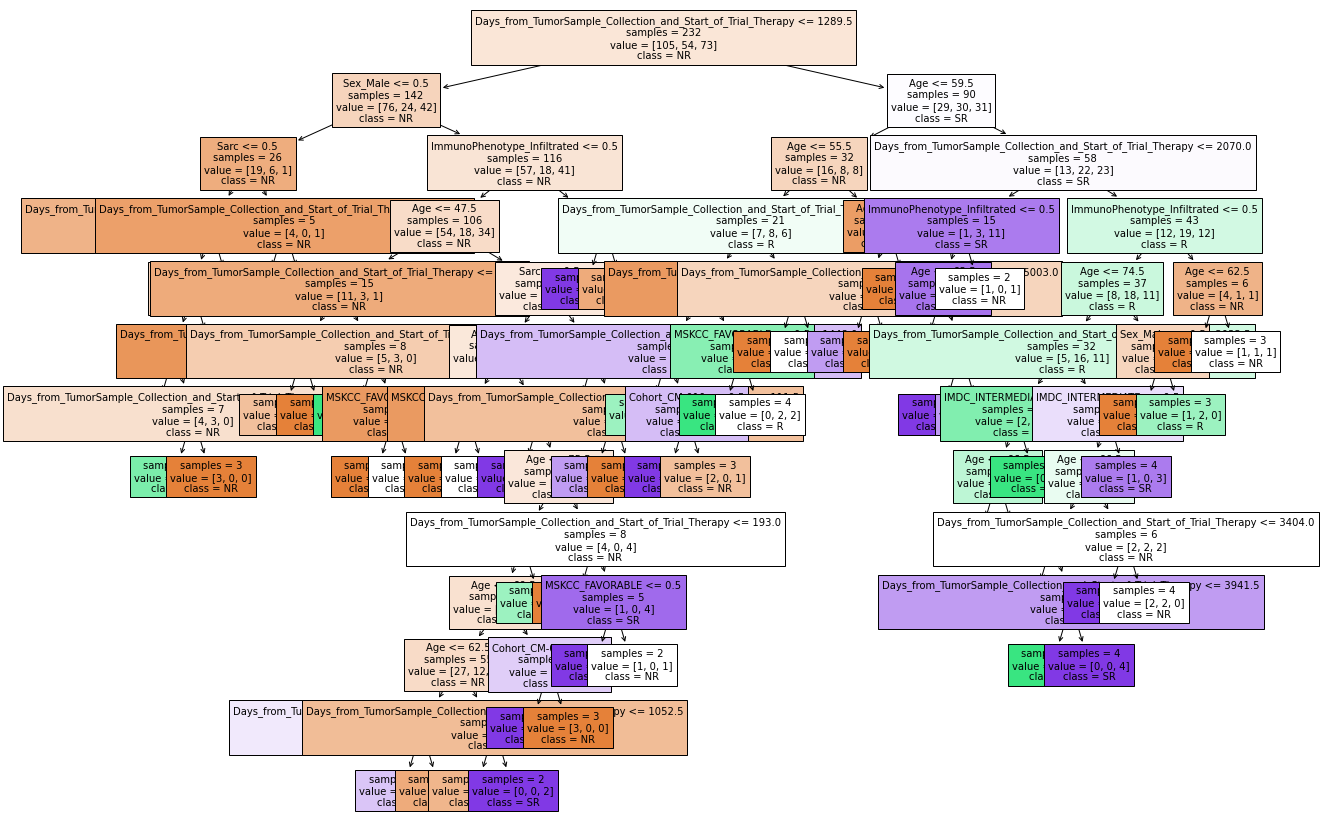

In [ ]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 15))

print(f"Tree depth: {model.get_depth()}")
print(f"Number of terminal nodes: {model.get_n_leaves()}")
plot = plot_tree(
            decision_tree = model,
            feature_names = ['Age', 'Sarc', 'Rhab',
       'Number_of_Prior_Therapies',
       'Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy',
       'Tumor_Shrinkage', 'TM_TC_Ratio', 'Cohort_CM-010', 'Cohort_CM-025',
       'Sex_Female', 'Sex_Male', 'MSKCC_FAVORABLE', 'MSKCC_INTERMEDIATE',
       'MSKCC_NA', 'MSKCC_POOR', 'IMDC_FAVORABLE', 'IMDC_INTERMEDIATE',
       'IMDC_NOT_REPORTED', 'IMDC_POOR', 'ImmunoPhenotype_Desert',
       'ImmunoPhenotype_Excluded', 'ImmunoPhenotype_Infiltrated',
       'ImmunoPhenotype_NA'],
            class_names   = ['NR', 'R', 'SR'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

*Everolimus test*

In [ ]:
path ='../../../Data_preprocessing/Testing with everolimus/Clinical_data_categorized_everolimus.csv'
data = pd.read_csv(path)

Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    elif data.PFS[i]<6:
        Y.append(1)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
data=data.drop(['Unnamed: 0', 'PFS', 'RNA_ID'], axis=1)

In [ ]:
data.head(5)

,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,TM_TC_Ratio,Cohort_CM-010,Cohort_CM-025,Sex_Female,...,MSKCC_NA,MSKCC_POOR,IMDC_FAVORABLE,IMDC_INTERMEDIATE,IMDC_NOT_REPORTED,IMDC_POOR,ImmunoPhenotype_Desert,ImmunoPhenotype_Excluded,ImmunoPhenotype_Infiltrated,ImmunoPhenotype_NA
0,59,0.0,0.0,1.0,1039,0.0,-1.0,0.0,1,0,...,0.0,0,0,1,0,0,0.0,0.0,0,1
1,72,0.0,0.0,1.0,544,0.0,-1.0,0.0,1,0,...,0.0,0,1,0,0,0,0.0,0.0,0,1
2,62,0.0,0.0,1.0,246,0.0,-1.0,0.0,1,0,...,0.0,0,0,0,1,0,0.0,0.0,0,1
3,56,0.0,0.0,1.0,4038,0.0,-1.0,0.0,1,0,...,0.0,0,0,1,0,0,0.0,0.0,0,1
4,81,0.0,0.0,2.0,-1,0.0,-1.0,0.0,1,0,...,0.0,0,0,1,0,0,0.0,0.0,0,1


In [ ]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(data)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(Y),1) :
    if (yhatTest[i] == Y[i]):
        contTest = contTest + 1

print('Final accuracy on the testing dataset: ' + str(contTest/len(Y)))

Final accuracy on the testing dataset: 0.27380952380952384


In [ ]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(Y,yhatTest))
print('Input data:  ' + str(np.array(Y)))
print('Prediction:        ' +str(yhatTest))
print(classification_report(Y,yhatTest))

----------------Confusion Matrix (Test)------------------
[[32 10 23]
 [39 14 50]
 [ 0  0  0]]
Input data:  [1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1
 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0
 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0]
Prediction:        [2 2 2 2 0 0 0 2 2 0 0 1 0 1 0 1 2 0 0 2 2 0 2 2 0 2 2 2 0 0 0 2 2 1 0 2 1
 2 2 0 2 0 0 2 0 2 2 0 1 2 2 1 0 0 2 1 2 2 1 2 0 2 2 2 0 0 1 0 1 2 2 0 2 2
 0 2 0 2 2 2 2 2 2 2 1 0 0 2 2 2 1 0 2 0 0 1 0 0 0 2 0 2 0 0 0 0 2 0 2 2 0
 2 0 1 1 0 0 1 0 0 0 2 2 2 0 0 2 0 0 0 0 0 0 0 2 2 2 2 0 0 0 2 0 2 0 0 2 1
 1 0 1 1 1 2 1 0 0 2 1 2 0 2 2 2 2 2 0 0]
              precision    recall  f1-score   support

           0       0.45      0.49      0.47        65
           1       0.58      0.14      0.22       103
           2       0.00   

C:\Users\sandr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
